# **Binary and multiclass classification**

In [ ]:
# BINARY CLASSIFICATION OF SPAM AND HAM MESSAGES


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# LOADING DATA
data = pd.read_table("/content/spam-detection-data.txt", sep = ",")
print(data.head(3))


# SPLITTING DATASET INTO FEATURES AND LABELS
messages = data["Message"]
labels = data["Label"]


# REMOVING NOISE (HTML TAGS) FROM DATA
def removeHtmlTags(text):
  result = text.split(">")[1].split("<")[0]
  return result

def removeNoise(messages):
  temporaryMessages = messages
  for i in range(0, temporaryMessages.shape[0]):
    temporaryMessages[i] = removeHtmlTags(temporaryMessages[i])
  return temporaryMessages

messages = removeNoise(messages)


# CHECKING DATA
print(f"FIRST SENTENCE LENGTH: {len(messages[0])}")
print(f"SECOND SENTENCE LENGHT: {len(messages[1])}")


# SPLITTING DATASET INTO TRAINING AND TESTING SETS
xTrain, xTest, yTrain, yTest = train_test_split(messages, labels, test_size = 0.1, random_state = 1)


# TOKENIZING TEXT
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xTrain)
print(f"WORDS DICTIONARY: {tokenizer.word_index}")
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)


# VECTORIZING TEXT
def vectorizeSequences(sequences, dimension = 4000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

def vectorizeLabels(labels):
  results = np.zeros((len(labels)))
  for i, label in enumerate(labels):
    if label == "Spam":
      results[i] = 1
  return results

xTrain = vectorizeSequences(xTrain)
xTest = vectorizeSequences(xTest)
yTrain = vectorizeLabels(yTrain)
yTest = vectorizeLabels(yTest)


# CREATING NEURAL NETWORK MODEL
model = models.Sequential()
model.add(layers.Dense(8, activation = "relu", input_shape = (4000,)))
model.add(layers.Dense(8, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


# COMPILING NEURAL NETWORK MODEL
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])


# NEURAL NETWORK MODEL TRAINING
trainingHistory = model.fit(xTrain, yTrain, epochs = 5, batch_size = 128, validation_split = 0.3)


# ANALYZING 
lossValues = trainingHistory.history["loss"]
validationLossValues = trainingHistory.history["val_loss"]
accuracy = trainingHistory.history["accuracy"]
validationAccuracy = trainingHistory.history["val_accuracy"]
epochs = range(1, len(lossValues) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, lossValues, "bo", label = "Training Loss")
plt.plot(epochs, validationLossValues, "b", label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, validationAccuracy, "b", label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()


# EVALUATING
model.evaluate(xTest, yTest)


# REAL DATA TEST
message = "This is spam message!"
tokenizedMessage = tokenizer.texts_to_sequences([message])
vectorizedMessage = vectorizeSequences(tokenizedMessage)
prediction = model.predict(vectorizedMessage)
prediction

Last three rows:                                                    post  tags
1987  directory folder name to put user defined pack...  java
1988  send message to server java  i m creating chat...  java
1989  how to add pattern of  *  is url-pattern in we...  java
Different programming languages: {'c#', 'javascript', 'java', 'python'}
Encoded labels: [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 32)                16032     
                                                                 
 dense_88 (Dense)            (None, 8)                 264       
                                                                 
 dense_89 (Dense)            (None, 4)                 36        
                                                                 


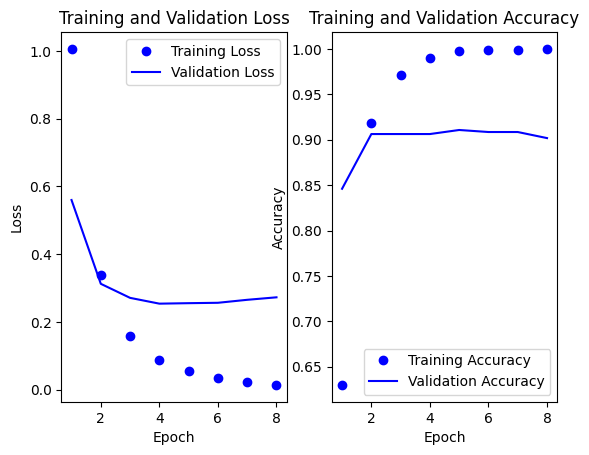

7/7 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9397


[0.16493229568004608, 0.9396985173225403]

In [95]:
# MULTICLASS CLASSIFICATION OF STACKOVERFLOW QUESTIONS


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# LOADING DATA
data = pd.read_csv("/content/stackoverflow-questions.csv")
print(f"Last three rows: {data.tail(3)}")


# SPLITTING DATASET INTO FEATURES AND LABELS
questions = data["post"]
labels = data["tags"]
print(f"Different programming languages: {set(labels)}")


# ENCODING LABELS (one-hot)
labelEncoder = LabelEncoder()
numericalLabels = labelEncoder.fit_transform(labels)
encodedLabels = to_categorical(numericalLabels)
print(f"Encoded labels: {encodedLabels}")


# SPLITTING DATASET INTO TRAINING AND TESTING SETS
xTrain, xTest, yTrain, yTest = train_test_split(questions, encodedLabels, test_size = 0.1)


# TOKENIZING DATA
tokenizer = Tokenizer(num_words = 500)
tokenizer.fit_on_texts(xTrain)
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)


# VECTORIZING DATA
def vectorizeSequences(sequences, dimension = 500):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

xTrain = vectorizeSequences(xTrain)
xTest = vectorizeSequences(xTest)


# CREATING NEURAL NETWORK MODEL
model = models.Sequential()
model.add(layers.Dense(32, activation = "relu", input_shape = (500,)))
model.add(layers.Dense(8, activation = "relu"))
model.add(layers.Dense(4, activation = "softmax"))


# COMPILING NEURAL NETWORK MODEL
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()


# TRAINING
trainingHistory = model.fit(xTrain, yTrain, epochs = 8, batch_size = 8, validation_split = 0.25)
history = trainingHistory.history


# ANALYZING
accuracy = history["accuracy"]
validationAccuracy = history["val_accuracy"]
lossValues = history["loss"]
validationLossValues = history["val_loss"]
epochs = range(1, len(lossValues) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, lossValues, "bo", label = "Training Loss")
plt.plot(epochs, validationLossValues, "b", label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, validationAccuracy, "b", label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()


# EVALUATION
model.evaluate(xTest, yTest)